# Predicting the Sale price of Bulldozers using Machine learning

In this notebook, we are going to go through an example machine learning project with the goal of predicting the sale price of bulldozers.

## 1. Problem definition

> How well can we predict the future sale price of a bulldozer, given its characteristics and previous examples of how much similar bulldozers have been sold for?


## 2. Data

The dataset used for this project is from Kaggle, which contains a CSV file with data about bulldozer sales in the United States 


## 3. Evaluation

The evaluation metric for this competition is the RMSLE (root mean squared log error) between the actual and predicted auction prices.

Note: the goal for most regression evaluation metrics is to minimize the error. for example, our goal for this project is to build a machine leaning model which minimizes RMSLE.


## 4. Features
Kaggle provides a data dictionary detailing all of the features of the dataset. You can view this data dictionary on Google Sheets:
 https://docs.google.com/spreadsheets/d/18ly-bLR8sbDJLITkWG7ozKm8l3RyieQ2Fpgix-beSYI/edit?usp=sharing



In [1]:
# Importing all modules that we need in our project
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [2]:
# IMport training and validation sets
df = pd.read_csv('TrainAndValid.csv', low_memory=False)


In [3]:
# a quick vision to the data
df.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1139246,66000.0,999089,3157,121,3.0,2004,68.0,Low,11/16/2006 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
1,1139248,57000.0,117657,77,121,3.0,1996,4640.0,Low,3/26/2004 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1139249,10000.0,434808,7009,121,3.0,2001,2838.0,High,2/26/2004 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1139251,38500.0,1026470,332,121,3.0,2001,3486.0,High,5/19/2011 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1139253,11000.0,1057373,17311,121,3.0,2007,722.0,Medium,7/23/2009 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
# Checking the missing values 
Missing_values = df.isnull().sum()
Missing_values_table = pd.DataFrame(Missing_values, columns=['Missing Values'])
Missing_values_table.sort_values(by=['Missing Values'], ascending=False)

,Missing Values
Engine_Horsepower,386715
Pushblock,386715
Enclosure_Type,386715
Blade_Width,386715
Blade_Extension,386715
Tip_Control,386715
Scarifier,386704
Grouser_Tracks,367823
Hydraulics_Flow,367823
Coupler_System,367724


Text(0.5, 1.0, 'Missing_values')

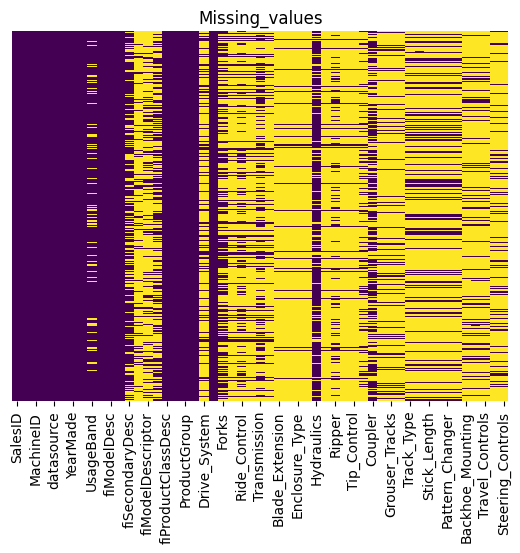

In [5]:
# # Visualize the missing value in heat map just the first 1000 value
Missing_values = df[:1000].isnull()
fig, ax = plt.subplots()
ax = sns.heatmap(Missing_values, cmap='viridis', cbar=False, yticklabels=False)
ax.set_title('Missing_values')

In [6]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412698 entries, 0 to 412697
Data columns (total 53 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   SalesID                   412698 non-null  int64  
 1   SalePrice                 412698 non-null  float64
 2   MachineID                 412698 non-null  int64  
 3   ModelID                   412698 non-null  int64  
 4   datasource                412698 non-null  int64  
 5   auctioneerID              392562 non-null  float64
 6   YearMade                  412698 non-null  int64  
 7   MachineHoursCurrentMeter  147504 non-null  float64
 8   UsageBand                 73670 non-null   object 
 9   saledate                  412698 non-null  object 
 10  fiModelDesc               412698 non-null  object 
 11  fiBaseModel               412698 non-null  object 
 12  fiSecondaryDesc           271971 non-null  object 
 13  fiModelSeries             58667 non-null   o

In [7]:
df.columns

Index(['SalesID', 'SalePrice', 'MachineID', 'ModelID', 'datasource',
       'auctioneerID', 'YearMade', 'MachineHoursCurrentMeter', 'UsageBand',
       'saledate', 'fiModelDesc', 'fiBaseModel', 'fiSecondaryDesc',
       'fiModelSeries', 'fiModelDescriptor', 'ProductSize',
       'fiProductClassDesc', 'state', 'ProductGroup', 'ProductGroupDesc',
       'Drive_System', 'Enclosure', 'Forks', 'Pad_Type', 'Ride_Control',
       'Stick', 'Transmission', 'Turbocharged', 'Blade_Extension',
       'Blade_Width', 'Enclosure_Type', 'Engine_Horsepower', 'Hydraulics',
       'Pushblock', 'Ripper', 'Scarifier', 'Tip_Control', 'Tire_Size',
       'Coupler', 'Coupler_System', 'Grouser_Tracks', 'Hydraulics_Flow',
       'Track_Type', 'Undercarriage_Pad_Width', 'Stick_Length', 'Thumb',
       'Pattern_Changer', 'Grouser_Type', 'Backhoe_Mounting', 'Blade_Type',
       'Travel_Controls', 'Differential_Type', 'Steering_Controls'],
      dtype='object')

In [8]:
# Because we have datetime object we should convert it to data time to visualize it
df['saledate'] = pd.to_datetime(df['saledate'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412698 entries, 0 to 412697
Data columns (total 53 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   SalesID                   412698 non-null  int64         
 1   SalePrice                 412698 non-null  float64       
 2   MachineID                 412698 non-null  int64         
 3   ModelID                   412698 non-null  int64         
 4   datasource                412698 non-null  int64         
 5   auctioneerID              392562 non-null  float64       
 6   YearMade                  412698 non-null  int64         
 7   MachineHoursCurrentMeter  147504 non-null  float64       
 8   UsageBand                 73670 non-null   object        
 9   saledate                  412698 non-null  datetime64[ns]
 10  fiModelDesc               412698 non-null  object        
 11  fiBaseModel               412698 non-null  object        
 12  fi

[Text(0.5, 0, 'Sale Date'),
 Text(0, 0.5, 'Sale Price'),
 Text(0.5, 1.0, 'Scatter Plot of Sale Price Over Time')]

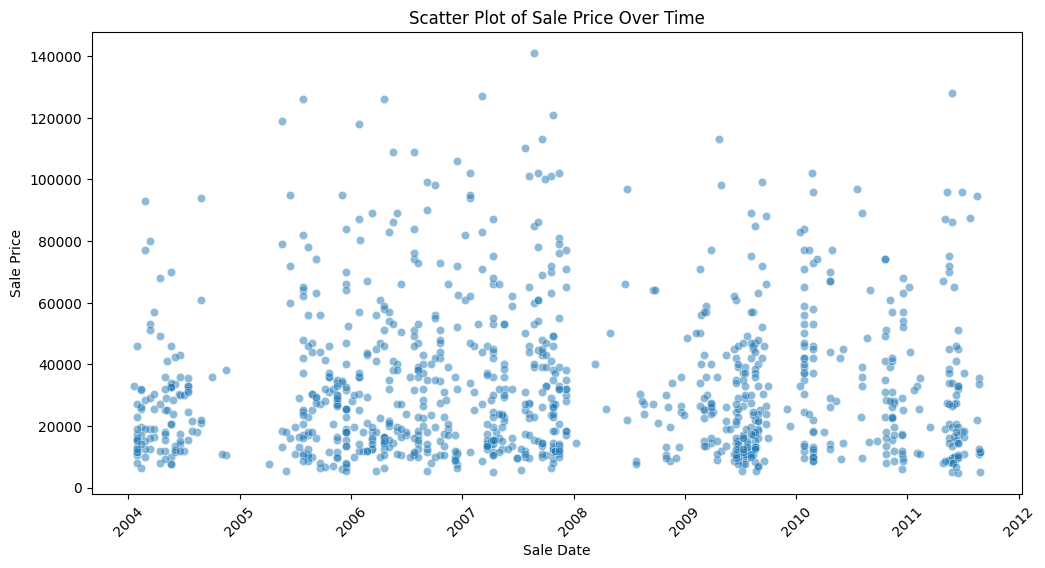

In [9]:
# Now we converted it to a datetime

fig, ax = plt.subplots(figsize=(12, 6))

# Create a scatter plot using Seaborn to a sample of 1000 value
sns.scatterplot(data=df[:1000], x='saledate', y='SalePrice', ax=ax, alpha=0.5)

# Format the date on the x-axis for better readability
plt.xticks(rotation=45)

# Add labels and a title
ax.set(xlabel='Sale Date', ylabel='Sale Price', title='Scatter Plot of Sale Price Over Time')

In [10]:
# We're gone make a copy from our original data frame 

df_tmp = df.copy()


In [11]:
# Sorting the values by date 
df_tmp.sort_values(by=['saledate'], inplace=True)

In [12]:
# creating a new column for year, moths, days, Dayofweek, Dayofyear
df_tmp['year'] = df_tmp['saledate'].dt.year
df_tmp['month'] = df_tmp['saledate'].dt.month
df_tmp['day'] = df_tmp['saledate'].dt.day
df_tmp['Dayofweek'] = df_tmp['saledate'].dt.day_of_week
df_tmp['Dayofyear'] = df_tmp['saledate'].dt.day_of_year

In [13]:
# Turning the categorical data to numeric data
object_columns = df_tmp.select_dtypes(include=['object'])
# Get column names as a list
object_column_list = object_columns.columns.tolist()
# Convert the categorical data to numeric data
for column in object_column_list:
    df_tmp[column] = df_tmp[column].astype('category').cat.as_ordered()

df_tmp.info()

<class 'pandas.core.frame.DataFrame'>
Index: 412698 entries, 205615 to 409203
Data columns (total 58 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   SalesID                   412698 non-null  int64         
 1   SalePrice                 412698 non-null  float64       
 2   MachineID                 412698 non-null  int64         
 3   ModelID                   412698 non-null  int64         
 4   datasource                412698 non-null  int64         
 5   auctioneerID              392562 non-null  float64       
 6   YearMade                  412698 non-null  int64         
 7   MachineHoursCurrentMeter  147504 non-null  float64       
 8   UsageBand                 73670 non-null   category      
 9   saledate                  412698 non-null  datetime64[ns]
 10  fiModelDesc               412698 non-null  category      
 11  fiBaseModel               412698 non-null  category      
 12  fi

## Filling and all numeric variables


In [14]:
# Checking all missing numeric values
numeric_columns = df_tmp.select_dtypes(include='number')
list_numeric_columns = numeric_columns.columns.to_list()


In [15]:
# filling all columns that have missing values with median
for column in list_numeric_columns:
    if df_tmp[column].isna().any():
        df_tmp[column].fillna(df_tmp[column].median(), inplace=True)
numeric_columns = df_tmp.select_dtypes(include='number')
numeric_columns.isna().sum()

SalesID                     0
SalePrice                   0
MachineID                   0
ModelID                     0
datasource                  0
auctioneerID                0
YearMade                    0
MachineHoursCurrentMeter    0
year                        0
month                       0
day                         0
Dayofweek                   0
Dayofyear                   0
dtype: int64

In [16]:
# This is a very important step because you will turing all columns to numbers and fill all missing values
for column in object_column_list:
    df_tmp[column] = pd.Categorical(df_tmp[column]).codes + 1

df_tmp.UsageBand.value_counts()

UsageBand
0    339028
3     35832
2     25311
1     12527
Name: count, dtype: int64

In [17]:
# now we are gonna build our machine learning model
df_tmp['year']

205615    1989
274835    1989
141296    1989
212552    1989
62755     1989
          ... 
410879    2012
412476    2012
411927    2012
407124    2012
409203    2012
Name: year, Length: 412698, dtype: int32

 Now that all of our data is numeric as well as our dataframe has no missing values, we should be able to build a machine learning model

In [18]:
df_tmp.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls,year,month,day,Dayofweek,Dayofyear
205615,1646770,9500.0,1126363,8434,132,18.0,1974,0.0,0,1989-01-17,...,1,8,6,0,0,1989,1,17,1,17
274835,1821514,14000.0,1194089,10150,132,99.0,1980,0.0,0,1989-01-31,...,0,0,0,4,2,1989,1,31,1,31
141296,1505138,50000.0,1473654,4139,132,99.0,1978,0.0,0,1989-01-31,...,1,8,6,0,0,1989,1,31,1,31
212552,1671174,16000.0,1327630,8591,132,99.0,1980,0.0,0,1989-01-31,...,0,0,0,4,2,1989,1,31,1,31
62755,1329056,22000.0,1336053,4089,132,99.0,1984,0.0,0,1989-01-31,...,1,6,5,0,0,1989,1,31,1,31


In [19]:
df_tmp.drop('saledate', axis=1, inplace=True)
df_tmp.info()

<class 'pandas.core.frame.DataFrame'>
Index: 412698 entries, 205615 to 409203
Data columns (total 57 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   SalesID                   412698 non-null  int64  
 1   SalePrice                 412698 non-null  float64
 2   MachineID                 412698 non-null  int64  
 3   ModelID                   412698 non-null  int64  
 4   datasource                412698 non-null  int64  
 5   auctioneerID              412698 non-null  float64
 6   YearMade                  412698 non-null  int64  
 7   MachineHoursCurrentMeter  412698 non-null  float64
 8   UsageBand                 412698 non-null  int8   
 9   fiModelDesc               412698 non-null  int16  
 10  fiBaseModel               412698 non-null  int16  
 11  fiSecondaryDesc           412698 non-null  int16  
 12  fiModelSeries             412698 non-null  int8   
 13  fiModelDescriptor         412698 non-null  i

In [20]:
# Instantiate the model 
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_jobs=-1,
                              random_state=42)

# Fit the model
model.fit(df_tmp.drop("SalePrice", axis=1), df_tmp["SalePrice"])

RandomForestRegressor(n_jobs=-1, random_state=42)

In [21]:
# Scoring the model 
model.score(df_tmp.drop("SalePrice", axis=1), df_tmp["SalePrice"])

0.9875605620349615

In [22]:
# Splitting the data into training and validation data 
df_val = df_tmp[df_tmp['year'] == 2012]
df_train = df_tmp[df_tmp['year'] != 2012]


In [23]:
# Splitting our data into x and y
x_train, y_train = df_train.drop("SalePrice", axis=1), df_train["SalePrice"]
x_valid, y_valid = df_val.drop("SalePrice", axis=1), df_val["SalePrice"]
x_train.shape, y_train.shape, x_valid.shape, y_valid.shape

((401125, 56), (401125,), (11573, 56), (11573,))

In [24]:
# Create evaluation function (the competition uses RMSLE)
from sklearn.metrics import mean_squared_log_error, mean_absolute_error, r2_score

def rmsle(y_test, y_preds):
    """
    Caculateing root mean squared log error between predictions and
    true labels.
    """
    return np.sqrt(mean_squared_log_error(y_test, y_preds))

# Create function to evaluate model on a few different levels
def show_scores(model):
    train_preds = model.predict(x_train)
    val_preds = model.predict(x_valid)
    scores = {"Training MAE": mean_absolute_error(y_train, train_preds),
              "Valid MAE": mean_absolute_error(y_valid, val_preds),
              "Training RMSLE": rmsle(y_train, train_preds),
              "Valid RMSLE": rmsle(y_valid, val_preds),
              "Training R^2": r2_score(y_train, train_preds),
              "Valid R^2": r2_score(y_valid, val_preds)}
    return scores

In [25]:
# Tuning the hyperparameter to get the best model
from sklearn.model_selection import RandomizedSearchCV

# Different RandomForestRegressor hyperparameters
rf_grid = {"n_estimators": np.arange(10, 100, 10),
           "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2),
           "max_features": [0.5, 1, "sqrt", "auto"],
           "max_samples": [10000]}

# Instantiate RandomizedSearchCV model
rs_model = RandomizedSearchCV(RandomForestRegressor(n_jobs=-1,
                                                    random_state=42),
                              param_distributions=rf_grid,
                              n_iter=2,
                              cv=5,
                              verbose=True)

# Fit the RandomizedSearchCV model
rs_model.fit(x_train, y_train)

Fitting 5 folds for each of 2 candidates, totalling 10 fits


C:\Users\mohammedsamir\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
5 fits failed out of a total of 10.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\mohammedsamir\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\mohammedsamir\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0

RandomizedSearchCV(cv=5,
                   estimator=RandomForestRegressor(n_jobs=-1, random_state=42),
                   n_iter=2,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'max_features': [0.5, 1, 'sqrt',
                                                         'auto'],
                                        'max_samples': [10000],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([10, 20, 30, 40, 50, 60, 70, 80, 90])},
                   verbose=True)

In [26]:
rs_model.best_params_


{'n_estimators': 90,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_samples': 10000,
 'max_features': 'sqrt',
 'max_depth': 3}

In [27]:
show_scores(rs_model)


{'Training MAE': 13154.747905250775,
 'Valid MAE': 15212.273819470858,
 'Training RMSLE': 0.5592287165768458,
 'Valid RMSLE': 0.5695918876502751,
 'Training R^2': 0.37129437758232786,
 'Valid R^2': 0.3579175201789916}

In [28]:
# Most ideal hyperparamters
ideal_model = RandomForestRegressor(n_estimators=40,
                                    min_samples_leaf=1,
                                    min_samples_split=14,
                                    max_features=0.5,
                                    n_jobs=-1,
                                    max_samples=None,
                                    random_state=42) # random state so our results are reproducible

# Fit the ideal model
ideal_model.fit(x_train, y_train)

RandomForestRegressor(max_features=0.5, min_samples_split=14, n_estimators=40,
                      n_jobs=-1, random_state=42)

In [29]:
show_scores(ideal_model)


{'Training MAE': 2942.3406510781565,
 'Valid MAE': 5963.47989565748,
 'Training RMSLE': 0.14415360816981193,
 'Valid RMSLE': 0.24694437453455997,
 'Training R^2': 0.9591796499547254,
 'Valid R^2': 0.8813934466550004}

In [30]:
# importing the testing data set 
def preprocess_data(df):
    # Add datetime parameters for saledate
    df['year'] = df['saledate'].dt.year
    df['month'] = df['saledate'].dt.month
    df['day'] = df['saledate'].dt.day
    df['Dayofweek'] = df['saledate'].dt.day_of_week
    df['Dayofyear'] = df['saledate'].dt.day_of_year

    # Drop original saledate
    df.drop("saledate", axis=1, inplace=True)
    
    # Fill numeric rows with the median
    for label, content in df.items():
        if pd.api.types.is_numeric_dtype(content):
            if pd.isnull(content).sum():
                df[label] = content.fillna(content.median())
                
        # Turn categorical variables into numbers
        if not pd.api.types.is_numeric_dtype(content):
            # We add the +1 because pandas encodes missing categories as -1
            df[label] = pd.Categorical(content).codes+ 1        
    
    return df


In [32]:
df_test = pd.read_csv("Test.csv",
                      parse_dates=["saledate"])
df_test.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,fiModelDesc,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1227829,1006309,3168,121,3,1999,3688.0,Low,2012-05-03,580G,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1227844,1022817,7271,121,3,1000,28555.0,High,2012-05-10,936,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1227847,1031560,22805,121,3,2004,6038.0,Medium,2012-05-10,EC210BLC,...,None or Unspecified,"9' 6""",Manual,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
3,1227848,56204,1269,121,3,2006,8940.0,High,2012-05-10,330CL,...,None or Unspecified,None or Unspecified,Manual,Yes,Triple,NaN,NaN,NaN,NaN,NaN
4,1227863,1053887,22312,121,3,2005,2286.0,Low,2012-05-10,650K,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,PAT,None or Unspecified,NaN,NaN


In [33]:
df_test = preprocess_data(df_test)
df_test.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,...,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls,year,month,day,Dayofweek,Dayofyear
0,1227829,1006309,3168,121,3,1999,3688.0,2,499,180,...,0,0,0,0,0,2012,5,3,3,124
1,1227844,1022817,7271,121,3,1000,28555.0,1,831,292,...,0,0,0,3,2,2012,5,10,3,131
2,1227847,1031560,22805,121,3,2004,6038.0,3,1177,404,...,0,0,0,0,0,2012,5,10,3,131
3,1227848,56204,1269,121,3,2006,8940.0,1,287,113,...,0,0,0,0,0,2012,5,10,3,131
4,1227863,1053887,22312,121,3,2005,2286.0,2,566,196,...,1,4,5,0,0,2012,5,10,3,131


In [34]:
x_train.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,...,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls,year,month,day,Dayofweek,Dayofyear
205615,1646770,1126363,8434,132,18.0,1974,0.0,0,4593,1744,...,1,8,6,0,0,1989,1,17,1,17
274835,1821514,1194089,10150,132,99.0,1980,0.0,0,1820,559,...,0,0,0,4,2,1989,1,31,1,31
141296,1505138,1473654,4139,132,99.0,1978,0.0,0,2348,713,...,1,8,6,0,0,1989,1,31,1,31
212552,1671174,1327630,8591,132,99.0,1980,0.0,0,1819,558,...,0,0,0,4,2,1989,1,31,1,31
62755,1329056,1336053,4089,132,99.0,1984,0.0,0,2119,683,...,1,6,5,0,0,1989,1,31,1,31


In [35]:
test_preds = ideal_model.predict(df_test)


In [36]:
# Create DataFrame compatible with Kaggle submission requirements
df_preds = pd.DataFrame()
df_preds["SalesID"] = df_test["SalesID"]
df_preds["SalePrice"] = test_preds
df_preds

,SalesID,SalePrice
0,1227829,17152.218726
1,1227844,19373.401780
2,1227847,48291.397304
3,1227848,67254.362942
4,1227863,55602.210485
...,...,...
12452,6643171,39339.691286
12453,6643173,12108.524162
12454,6643184,14135.970839
12455,6643186,16879.806660


In [38]:
# Export to csv...
df_preds.to_csv("predictions.csv",
               index=False)

In [39]:
# Find feature importance of our best model
ideal_model.feature_importances_

array([0.03504446, 0.01737377, 0.04452544, 0.00201861, 0.00329883,
       0.20660726, 0.00344748, 0.00114963, 0.04058348, 0.05493139,
       0.06503969, 0.00575552, 0.0321875 , 0.17402344, 0.05321646,
       0.00603849, 0.00377422, 0.0039449 , 0.00285774, 0.0452063 ,
       0.00058484, 0.00022675, 0.00068161, 0.00023714, 0.00109263,
       0.00205171, 0.00253838, 0.00713099, 0.00098058, 0.00118632,
       0.00687476, 0.00636725, 0.00445288, 0.00199   , 0.00230712,
       0.01849539, 0.00164826, 0.02175104, 0.0011747 , 0.00794414,
       0.00134719, 0.00095435, 0.00156937, 0.00057406, 0.00038231,
       0.00049513, 0.00073075, 0.00460091, 0.00080785, 0.00035168,
       0.00083585, 0.07404403, 0.00384739, 0.00568805, 0.0029616 ,
       0.0100684 ])

In [40]:
import seaborn as sns

# Helper function for plotting feature importance
def plot_features(columns, importances, n=20):
    df = (pd.DataFrame({"features": columns,
                        "feature_importance": importances})
          .sort_values("feature_importance", ascending=False)
          .reset_index(drop=True))
    
    sns.barplot(x="feature_importance",
                y="features",
                data=df[:n],
                orient="h")

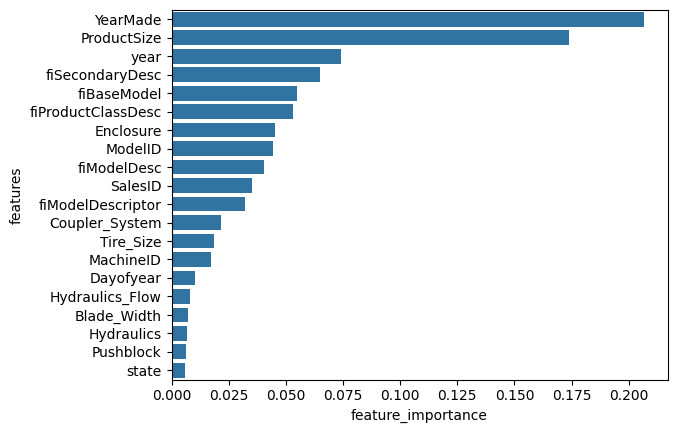

In [42]:
plot_features(x_train.columns, ideal_model.feature_importances_)


In [43]:
sum(ideal_model.feature_importances_)


1.0000000000000002

In [44]:
df.ProductSize.isna().sum()


216605

In [45]:
df.ProductSize.value_counts()


ProductSize
Medium            64342
Large / Medium    51297
Small             27057
Mini              25721
Large             21396
Compact            6280
Name: count, dtype: int64

In [46]:
df.Turbocharged.value_counts()


Turbocharged
None or Unspecified    77111
Yes                     3985
Name: count, dtype: int64

In [47]:
df.Thumb.value_counts()


Thumb
None or Unspecified    85074
Manual                  9678
Hydraulic               7580
Name: count, dtype: int64